## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [110]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [111]:
data = pd.read_csv("https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv", 
                 sep=',')
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [112]:
data.isna().sum() # все нули поэтому пропущенных значений нет
'''
status                     порядковые
duration                   количественные
credit_history             порядковые
purpose                    категориальные
amount                     количественные
savings                    порядковые
employment_duration        порядковые
installment_rate           порядковые
personal_status_sex        категориальные
other_debtors              категориальные
present_residence          категориальные
property                   категориальные
age                        количественные
other_installment_plans    категориальные
housing                    порядковые
number_credits             порядковые
job                        порядковые
people_liable              бинарные
telephone                  бинарные
foreign_worker             бинарные
credit_risk                бинарные
'''

'\nstatus                     порядковые\nduration                   количественные\ncredit_history             порядковые\npurpose                    категориальные\namount                     количественные\nsavings                    порядковые\nemployment_duration        порядковые\ninstallment_rate           порядковые\npersonal_status_sex        категориальные\nother_debtors              категориальные\npresent_residence          категориальные\nproperty                   категориальные\nage                        количественные\nother_installment_plans    категориальные\nhousing                    порядковые\nnumber_credits             порядковые\njob                        порядковые\npeople_liable              бинарные\ntelephone                  бинарные\nforeign_worker             бинарные\ncredit_risk                бинарные\n'

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [113]:
data.groupby('purpose')['amount',].mean()

,amount
purpose,
business,8209.333333
car (new),5370.223301
car (used),3066.983425
domestic appliances,2728.090909
furniture/equipment,2487.685714
others,3062.948718
radio/television,1498.000000
repairs,3180.400000
retraining,4158.041237


### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [114]:
cond_1 = (data['age'] < 30) & (data['housing'] == 'rent')
cond_2 = (data['age'] > 40) & (data['housing'] == 'rent')
print('Процент клинтов моложе 30 лет снимает жилье:', 100*data[cond_1].shape[0]/data.shape[0])
print('Процент клинтов старше 40 лет снимает жилье:', 100*data[cond_2].shape[0]/data.shape[0])

Процент клинтов моложе 30 лет снимает жилье: 24.6
Процент клинтов старше 40 лет снимает жилье: 18.5


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [115]:
cond_3 = (data['foreign_worker'] == 'yes') & (data['number_credits'] != '1') & (data['number_credits'] != '2-3')
data['number_credits'].unique()
print('У скольких иностранцев число кредитов больше 3?:', data[cond_3].shape[0])

У скольких иностранцев число кредитов больше 3?: 1


### Задание 6 (1 балл)

In [116]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

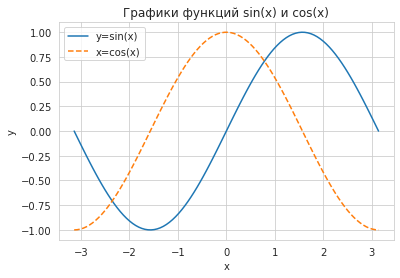

In [117]:
x = np.linspace(-np.pi, np.pi, 100)
plt.figure()
plt.grid()
plt.plot(x, np.sin(x), linestyle = '-', label='y=sin(x)')
plt.plot(x, np.cos(x), linestyle = '--', label='x=cos(x)')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Графики функций sin(x) и cos(x)')
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

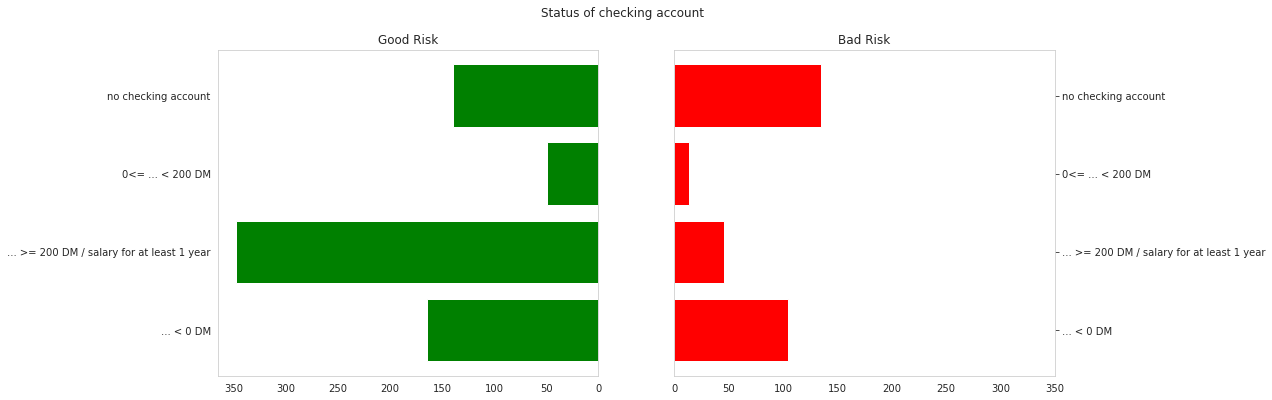

In [118]:
good = data[data['credit_risk'] == 'good']['status'].value_counts().sort_index()
bad = data[data['credit_risk'] == 'bad']['status'].value_counts().sort_index()


fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Status of checking account')
ax1.barh(good.index.values.tolist(), good.values.tolist(), color='g')
ax2.barh(bad.index.values.tolist(), bad.values.tolist(), color='r')
plt.xlim(right=350)
ax2.yaxis.tick_right()
ax1.invert_xaxis()
ax1.set_title('Good Risk')
ax2.set_title('Bad Risk')
fig.set_figwidth(15) 
fig.set_figheight(6) 

### Задание 8  (0.5 балла)

In [119]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

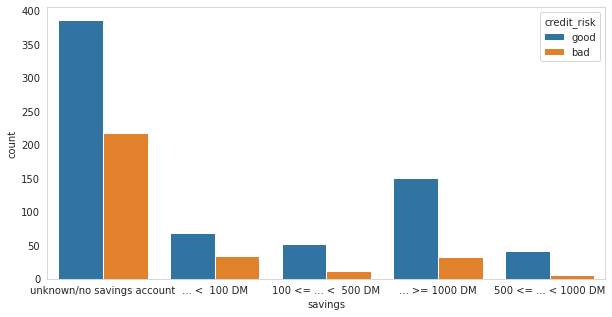

In [120]:
plt.figure(figsize=(10, 5))
sns.countplot(x='savings', hue='credit_risk', data=data)
plt.show()
#Очевидно бибилиотека seeborn предоставляет намного приятный способ вывода информации и самое главное код занимает 
#меньше места

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

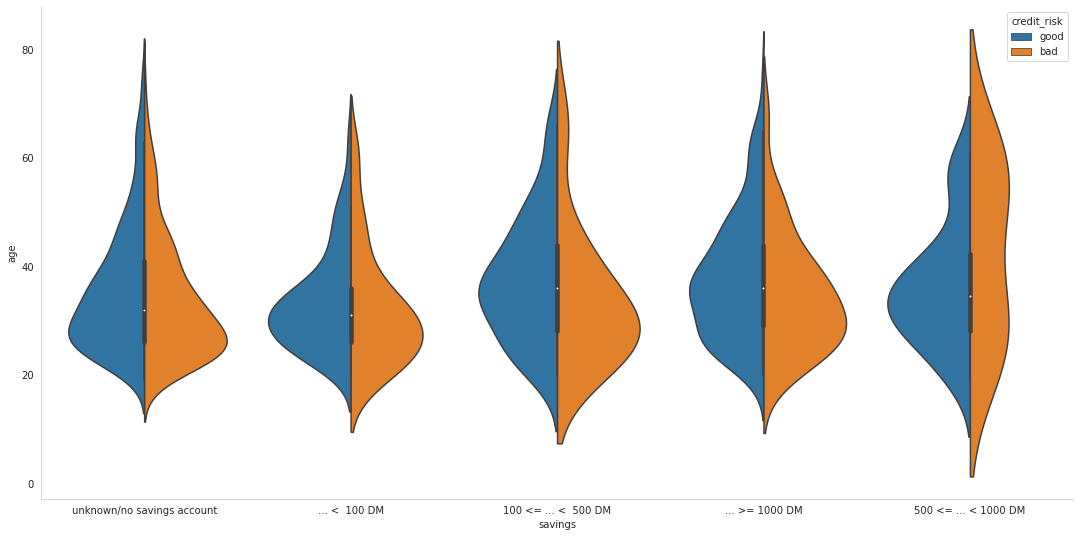

In [121]:
g = sns.catplot(x='savings',
            y='age',
            hue='credit_risk',
            kind='violin',
            split=True,
            data=data, 
            legend=False);
g.fig.set_figwidth(19)
g.fig.set_figheight(8)
plt.legend(loc='upper right', title='credit_risk')

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

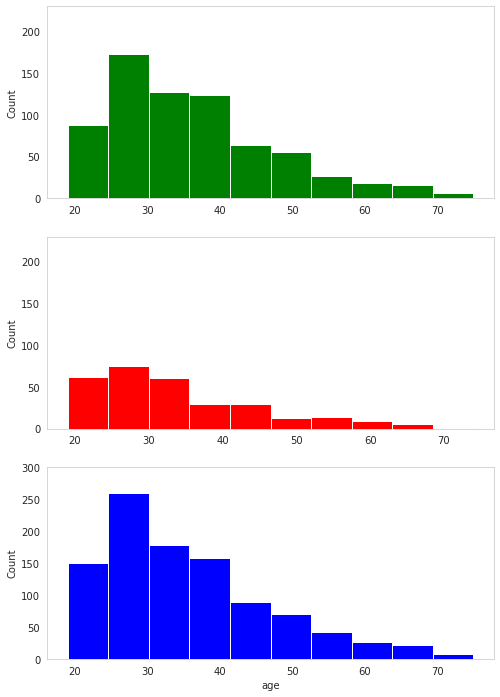

In [122]:
plt.figure(figsize=(8, 12))
plt.subplot(3, 1, 1)
plt.hist(data[data['credit_risk'] == 'good']['age'], bins=10, color='green')
plt.ylim(0, 230)
plt.ylabel('Count')
plt.subplot(3, 1, 2)
plt.hist(data[data['credit_risk'] == 'bad']['age'], bins=10, color='red')
plt.ylim(0, 230)
plt.ylabel('Count')
plt.subplot(3, 1, 3)
plt.hist(data['age'], bins=10, color='blue')
plt.ylim(0, 300)
plt.xlabel('age')
plt.ylabel('Count')
plt.show()

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

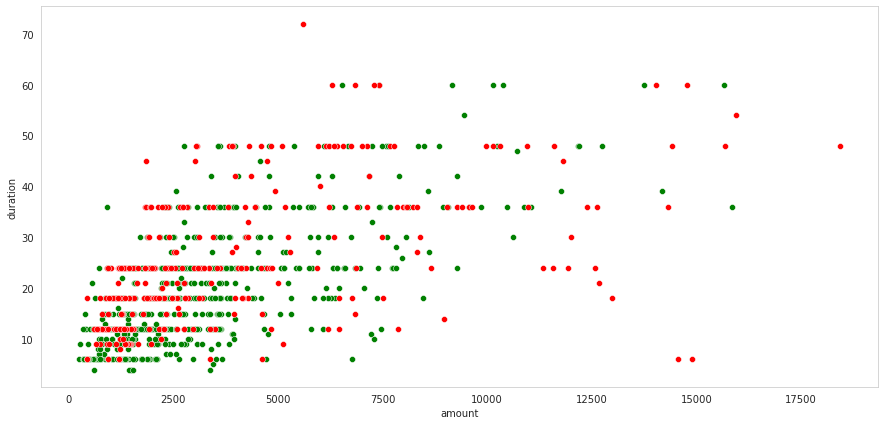

In [123]:
plt.figure(figsize=(15, 7))
good_risk = data[data['credit_risk'] == 'good']
bad_risk = data[data['credit_risk'] == 'bad']
sns.scatterplot(x = good_risk['amount'], y = good_risk['duration'], color='green')
sns.scatterplot(x = bad_risk['amount'], y = bad_risk['duration'], color='red')
plt.show()

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

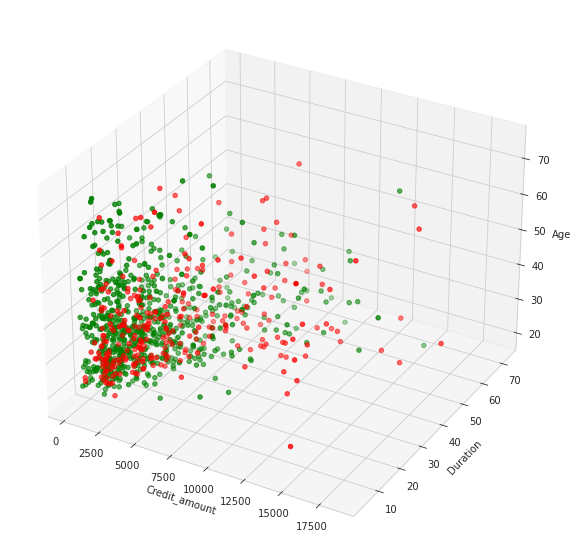

In [124]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')
good = data[data['credit_risk'] == 'good']
bad = data[data['credit_risk'] == 'bad']
x1, y1, z1 = good['amount'], good['duration'], good['age']
x2, y2, z2 = bad['amount'], bad['duration'], bad['age']
ax.scatter(x1, y1, z1, marker='o', color ='green')
ax.scatter(x2, y2, z2, marker='o', color = 'red')
ax.set_xlabel('Credit_amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')
plt.show()

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [125]:
newData = data.drop(['purpose', 
                     'personal_status_sex', 
                     'other_debtors',
                     'present_residence', 
                     'property', 
                     'other_installment_plans'],
                    axis = 1)
newData = newData.astype('category')
colomn = ['status',
        'duration',
        'credit_history',
        'amount',
        'savings',
        'employment_duration',
        'installment_rate',
        'age',
        'housing',
        'number_credits',
        'job',
        'people_liable',
        'telephone',
        'foreign_worker',
        'credit_risk']
for col in colomn:
    newData[col] = newData[col].cat.codes
newData

,status,duration,credit_history,amount,savings,employment_duration,installment_rate,age,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,3,13,0,116,4,2,2,2,0,0,1,0,0,0,1
1,3,5,0,528,4,0,1,17,0,1,1,1,0,0,1
2,0,8,4,72,0,1,1,4,0,0,3,0,0,0,1
3,3,8,0,398,4,0,0,20,0,1,3,1,0,1,1
4,3,8,0,411,4,0,2,19,2,1,3,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,17,4,375,4,0,1,2,0,0,3,1,0,0,0
996,3,17,4,438,4,3,2,26,2,0,1,0,0,0,0
997,1,15,0,907,1,3,2,11,1,0,0,0,1,0,0
998,0,8,4,799,1,4,1,33,2,0,0,0,1,0,0


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [127]:
def predict(Xtest: np.array) -> np.array:
    return 1

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here
accuracy_score(y_test, predict(X_test))

/tmp/ipykernel_3188/3364054783.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('credit_risk', 1).values


TypeError: Expected sequence or array-like, got <class 'int'>